In [29]:
#Importing necessary libraries
import sklearn.metrics as metrics
import datetime
import re
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import math
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [30]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [31]:
#Reading the data file
df = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/de_sa_2021_2022.xlsx")
dfcleaned = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/cleaned_sa_2021_2022.xlsx")

In [32]:
df.shape

(31060, 48)

## 1. Testing on various datasets

In [33]:
# Creating a deep copies of the DataFrame for testing purposes
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)
df3 = df.copy(deep=True)
df4 = df.copy(deep=True)
df5 = df.copy(deep=True)
df6 = df.copy(deep=True)
df7 = df.copy(deep=True)
df8 = df.copy(deep=True)
df9 = df.copy(deep=True)
df10 = df.copy(deep=True)
df11 = df.copy(deep=True)
df12 = df.copy(deep=True)
df13 = df.copy(deep=True)
df14 = df.copy(deep=True)
df15 = df.copy(deep=True)
df16 = df.copy(deep=True)
df17 = df.copy(deep=True)
df18 = df.copy(deep=True)
df19 = df.copy(deep=True)
df20 = df.copy(deep=True)
df21 = df.copy(deep=True)
df22 = df.copy(deep=True)
df23 = df.copy(deep=True)
df24 = df.copy(deep=True)
df25 = df.copy(deep=True)

In [34]:
# Define a function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 1850.000:
        return 1
    elif 1850.000 <= bmi < 2500.000:
        return 2
    elif 2500.000 <= bmi < 3000.000:
        return 3
    else:
        return 4

# Apply the function to create the new column
df22['BMICAT'] = df22['BMI'].apply(categorize_bmi)

In [35]:
#Considering different datasets
#1. Males
df1 = df1[df1['SEX'].isin([1])]
#2. Females
df2 = df2[df2['SEX'].isin([2])]
#3. Senior populations
df3 = df3[df3['SENIOR'].isin([2])]
#4. People below age of 65
df4 = df4[df4['SENIOR'].isin([1])]
#5. Whites
df5 = df5[df5['RACE'].isin([1])]
#6. Blacks
df6 = df6[df6['RACE'].isin([2])]
#7. Asians
df7 = df7[df7['RACE'].isin([4])]
#8. Native populations
df8 = df8[df8['RACE'].isin([3,5])]
#9. Cardiac conditions
df9 = df9[df9['CARDIOCOND'].isin([1])]
#10. Cancer
df10 = df10[df10['CANCER'].isin([1])]
#11. Diabetic populations
df11 = df11[df11['DIABETE4'].isin([1])]
#12. Urban counties
df12 = df12[df12['URBSTAT'].isin([1])]
#13. Rural counties
df13 = df13[df13['URBSTAT'].isin([2])]
#14. People who have health insurance
df14 = df14[df14['HLTHINSU'].isin([1])]
#15. Young Adults
df15 = df15[df15['AGE'].isin([1])]
#16. Participants with Depression
df16 = df16[df16['ADDEPEV3'].isin([1])]
#17. Low socio-economic group
df17 = df17[df17['INCOME'].isin([1])]
#18. Veterans
df18 = df18[df18['VETERAN3'].isin([1])]
#19. Family history of drug abuse
df19 = df19[df19['ACEDRUGS'].isin([1])]
#20. Lack of education
df20 = df20[df20['EDUCA'].isin([1])]
#21. Physically active individuals
df21 = df21[df21['EXERCISE'].isin([1])]
#22. Overweight or Obese
df22 = df22[df22['BMICAT'].isin([3,4])]

In [36]:
df1 = df1.drop(['SEX'], axis=1)
df2 = df2.drop(['SEX'], axis=1)
df3 = df3.drop(['SENIOR'], axis=1)
df4 = df4.drop(['SENIOR'], axis=1)
df5 = df5.drop(['RACE'], axis=1)
df6 = df6.drop(['RACE'], axis=1)
df7 = df7.drop(['RACE'], axis=1)
df8 = df8.drop(['RACE'], axis=1)
df9 = df9.drop(['CARDIOCOND'], axis=1)
df10 = df10.drop(['CANCER'], axis=1)
df11 = df11.drop(['DIABETE4'], axis=1)
df12 = df12.drop(['URBSTAT'], axis=1)
df13 = df13.drop(['URBSTAT'], axis=1)
df14 = df14.drop(['HLTHINSU'], axis=1)
df15 = df15.drop(['AGE'], axis=1)
df16 = df16.drop(['ADDEPEV3'], axis=1)
df17 = df17.drop(['INCOME'], axis=1)
df18 = df18.drop(['VETERAN3'], axis=1)
df19 = df19.drop(['ACEDRUGS'], axis=1)
df20 = df20.drop(['EDUCA'], axis=1)
df21 = df21.drop(['EXERCISE'], axis=1)
df22 = df22.drop(['BMICAT'],axis=1)

In [37]:
# To store the details of confusion matrix and feature importances of various classifiers
results = []

In [38]:
# All the datasets that need to be used
datasets = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23]

# Example models (you can add more models as needed)
classifiers = {
    'Random Forest': RandomForestClassifier()
}

# Function to extract confusion matrix details
def extract_confusion_matrix_details(conf_matrix):
    """Extract TP, FP, TN, FN from the confusion matrix."""
    TP = conf_matrix[1, 1]
    FP = conf_matrix[0, 1]
    TN = conf_matrix[0, 0]
    FN = conf_matrix[1, 0]
    return TP, FP, TN, FN

# Iterate over each dataset
for i, dataset in enumerate(datasets):
    print(f"Running models on dataset {i+1}")

    # Split the dataset into features and target
    X = dataset.drop(['TARGET_ABUSER'], axis=1)
    y = dataset['TARGET_ABUSER']
    # Oversampling using SMOTE
    from collections import Counter
    from imblearn.over_sampling import SMOTE
    #current class distribution
    print(Counter(y))
    # define oversample strategy
    sm = SMOTE(random_state=42)
    # fit and apply the transform
    X, y = sm.fit_resample(X, y)
    # summarize class distribution after oversampling
    print(Counter(y))

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Train and evaluate each classifier
    for name, clf in classifiers.items():
        print(f"Training {name}...")
        # fitting the model to the data
        clf.fit(X_train, y_train)
        # predicting the output
        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)
        # classification report
        clf_report = classification_report(y_test, y_pred)
        print(f"Classification Report : \n{clf_report}")

        # Get the predicited probability of testing data
        if hasattr(clf, "predict_proba"):
          y_score = clf.predict_proba(X_test)[:, 1]
        else:
          y_score = clf.predict(X_test)

        # Average precision score
        average_precision = average_precision_score(y_test, y_score)
        #print(average_precision)

        from sklearn.metrics import auc
        # Data to plot precision - recall curve
        precision, recall, thresholds = precision_recall_curve(y_test, y_score)
        # Use AUC function to calculate the area under the curve of precision recall curve
        auc_precision_recall = auc(recall, precision)
        #print(auc_precision_recall)

        #printing the confusion matrix
        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
        #print(f"Confusion Matrix : \n{confusion_matrix}")
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
        cm_display.plot()
        plt.show()

        #calculate AUC of model
        auc1 = metrics.roc_auc_score(y_test, y_pred)
        #print('Area Under the Curve',auc1)

        from sklearn.metrics import mean_squared_error
        import math
        MSE = mean_squared_error(y_test, y_pred)
        RMSE = math.sqrt(MSE)

        # Collect confusion matrix details for each model
        TP, FP, TN, FN = extract_confusion_matrix_details(confusion_matrix)
        results.append({
        "Dataset": dataset,
        "Model": name,
        "True Positive": TP,
        "False Positive": FP,
        "True Negative": TN,
        "False Negative": FN,
        "ROC AUC" : auc1,
        "PR AUC" : auc_precision_recall,
        "RMSE" : RMSE})

        # get feature importance
        feature_importances = clf.feature_importances_

        plt.rcParams["figure.figsize"] = (8,8)
        # Get feature names
        feature_names = X.columns.tolist()

        # Sort the feature importances and feature names in descending order
        sorted_indices = np.argsort(feature_importances)
        sorted_feature_importances = [feature_importances[i] for i in sorted_indices]
        sorted_feature_names = [feature_names[i] for i in sorted_indices]

        # Plot the horizontal bar chart for feature importance
        plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
        plt.xlabel('Feature Importance Scores')
        plt.ylabel('Features')
        plt.title('Feature Importance in Descending Order')
        plt.show()

        print()  # Add a newline for better readability between datasets and models

# Organize the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print("Confusion Matrix Details:")
print(results_df)

Output hidden; open in https://colab.research.google.com to view.

In [39]:
results_df

,Dataset,Model,True Positive,False Positive,True Negative,False Negative,ROC AUC,PR AUC,RMSE
0,GENHLTH PHYHLTH MENHLTH HLTHINSU PE...,Random Forest,2028,410,2243,693,0.795,0.894,0.453
1,GENHLTH PHYHLTH MENHLTH HLTHINSU PE...,Random Forest,3069,307,3354,493,0.889,0.958,0.333
2,SEX GENHLTH PHYHLTH MENHLTH HLTHINS...,Random Forest,2166,246,2465,453,0.868,0.942,0.362
3,SEX GENHLTH PHYHLTH MENHLTH HLTHINS...,Random Forest,2789,428,3116,714,0.838,0.925,0.403
4,SEX GENHLTH PHYHLTH MENHLTH HLTHINS...,Random Forest,4141,656,4478,939,0.844,0.928,0.395
5,SEX GENHLTH PHYHLTH MENHLTH HLTHINS...,Random Forest,296,23,318,31,0.919,0.972,0.284
6,SEX GENHLTH PHYHLTH MENHLTH HLTHINS...,Random Forest,113,5,114,8,0.946,0.989,0.233
7,SEX GENHLTH PHYHLTH MENHLTH HLTHINS...,Random Forest,97,4,98,21,0.891,0.961,0.337
8,SEX GENHLTH PHYHLTH MENHLTH HLTHINS...,Random Forest,491,41,561,85,0.892,0.960,0.327
9,SEX GENHLTH PHYHLTH MENHLTH HLTHINS...,Random Forest,1019,132,1089,210,0.861,0.947,0.374


In [40]:
dataset_mapping = {0: 'Male participants', 1: 'Females participants', 2: 'Seniors', 3: 'Participants below 65', 4: 'White populations',
                   5: 'Black populations', 6: 'Asian populations', 7: 'Native populations', 8: 'Cardiac conditions',
                   9: 'Cancer conditions', 10: 'Diabetes', 11: 'Urban counties', 12: 'Rural counties', 13: 'Participants with health insurance',
                   14: 'Young adults', 15: 'Depression', 16: 'Low socio economic populations', 17: 'Veterans',
                   18: 'Family history of drug abuse', 19: 'Lack of education', 20: 'Physically active individuals',21: 'Overweight or Obese',
                   22: 'Baseline'}

for index, dataset_name in dataset_mapping.items():
    results_df.iloc[index, results_df.columns.get_loc('Dataset')] = dataset_name

In [41]:
# Creating a deep copy of the DataFrame for adding more evaluation metrics
eval_df = results_df.copy(deep=True)

In [42]:
eval_df

,Dataset,Model,True Positive,False Positive,True Negative,False Negative,ROC AUC,PR AUC,RMSE
0,Male participants,Random Forest,2028,410,2243,693,0.795,0.894,0.453
1,Females participants,Random Forest,3069,307,3354,493,0.889,0.958,0.333
2,Seniors,Random Forest,2166,246,2465,453,0.868,0.942,0.362
3,Participants below 65,Random Forest,2789,428,3116,714,0.838,0.925,0.403
4,White populations,Random Forest,4141,656,4478,939,0.844,0.928,0.395
5,Black populations,Random Forest,296,23,318,31,0.919,0.972,0.284
6,Asian populations,Random Forest,113,5,114,8,0.946,0.989,0.233
7,Native populations,Random Forest,97,4,98,21,0.891,0.961,0.337
8,Cardiac conditions,Random Forest,491,41,561,85,0.892,0.960,0.327
9,Cancer conditions,Random Forest,1019,132,1089,210,0.861,0.947,0.374


In [43]:
#Adding more evaluation metrics
eval_df['Accuracy'] = (( eval_df['True Positive'] + eval_df['True Negative'] ) / ( eval_df['True Positive'] + eval_df['False Positive'] + eval_df['False Negative'] + eval_df['True Negative'] ))
eval_df['Precision'] = eval_df['True Positive'] / (eval_df['True Positive'] + eval_df['False Positive'])
eval_df['Recall'] = eval_df['True Positive'] / (eval_df['True Positive'] + eval_df['False Negative'])
eval_df['Specificity'] = eval_df['True Negative'] / (eval_df['True Negative'] + eval_df['False Positive'])
eval_df['F1 Score'] = (2*eval_df['Precision']*eval_df['Recall']) / (eval_df['Precision'] + eval_df['Recall'])
eval_df['FPR'] = eval_df['False Positive'] / (eval_df['False Positive'] + eval_df['True Negative'])

In [44]:
# Modifications on the final evaluation dataframe
eval_df = eval_df.drop(['Model'],axis=1)
eval_df.index = eval_df.index + 1
eval_df.rename(columns={'True Positive': 'TP', 'False Positive': 'FP', 'True Negative': 'TN', 'False Negative': 'FN'}, inplace=True)

In [45]:
eval_df

,Dataset,TP,FP,TN,FN,ROC AUC,PR AUC,RMSE,Accuracy,Precision,Recall,Specificity,F1 Score,FPR
1,Male participants,2028,410,2243,693,0.795,0.894,0.453,0.795,0.832,0.745,0.845,0.786,0.155
2,Females participants,3069,307,3354,493,0.889,0.958,0.333,0.889,0.909,0.862,0.916,0.885,0.084
3,Seniors,2166,246,2465,453,0.868,0.942,0.362,0.869,0.898,0.827,0.909,0.861,0.091
4,Participants below 65,2789,428,3116,714,0.838,0.925,0.403,0.838,0.867,0.796,0.879,0.830,0.121
5,White populations,4141,656,4478,939,0.844,0.928,0.395,0.844,0.863,0.815,0.872,0.839,0.128
6,Black populations,296,23,318,31,0.919,0.972,0.284,0.919,0.928,0.905,0.933,0.916,0.067
7,Asian populations,113,5,114,8,0.946,0.989,0.233,0.946,0.958,0.934,0.958,0.946,0.042
8,Native populations,97,4,98,21,0.891,0.961,0.337,0.886,0.960,0.822,0.961,0.886,0.039
9,Cardiac conditions,491,41,561,85,0.892,0.960,0.327,0.893,0.923,0.852,0.932,0.886,0.068
10,Cancer conditions,1019,132,1089,210,0.861,0.947,0.374,0.860,0.885,0.829,0.892,0.856,0.108


<ipython-input-46-35a2e8b6abab>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1447: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.plot_data[axis] = cat_data
<ipython-input-46-35a2e8b6abab>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


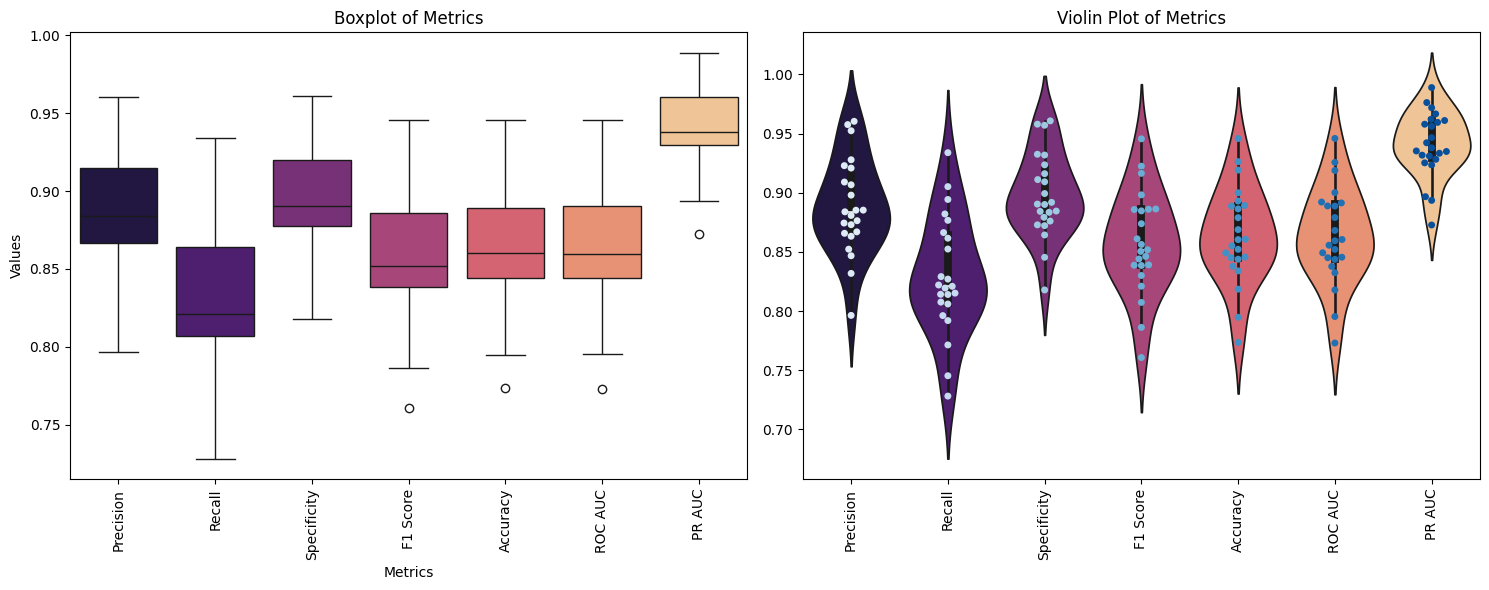

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating boxplots of the metrics
metrics = ['Precision', 'Recall', 'Specificity', 'F1 Score', 'Accuracy', 'ROC AUC', 'PR AUC']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot
sns.boxplot(data=eval_df[metrics], palette='magma', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_xlabel("Metrics")
axes[0].set_ylabel("Values")
axes[0].set_title('Boxplot of Metrics')

# Violin Plot for the new fields
sns.violinplot(data=eval_df[metrics], palette='magma', ax=axes[1])
sns.swarmplot(data=eval_df[metrics], ax=axes[1], palette='Blues')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title('Violin Plot of Metrics')

plt.tight_layout()
plt.show()


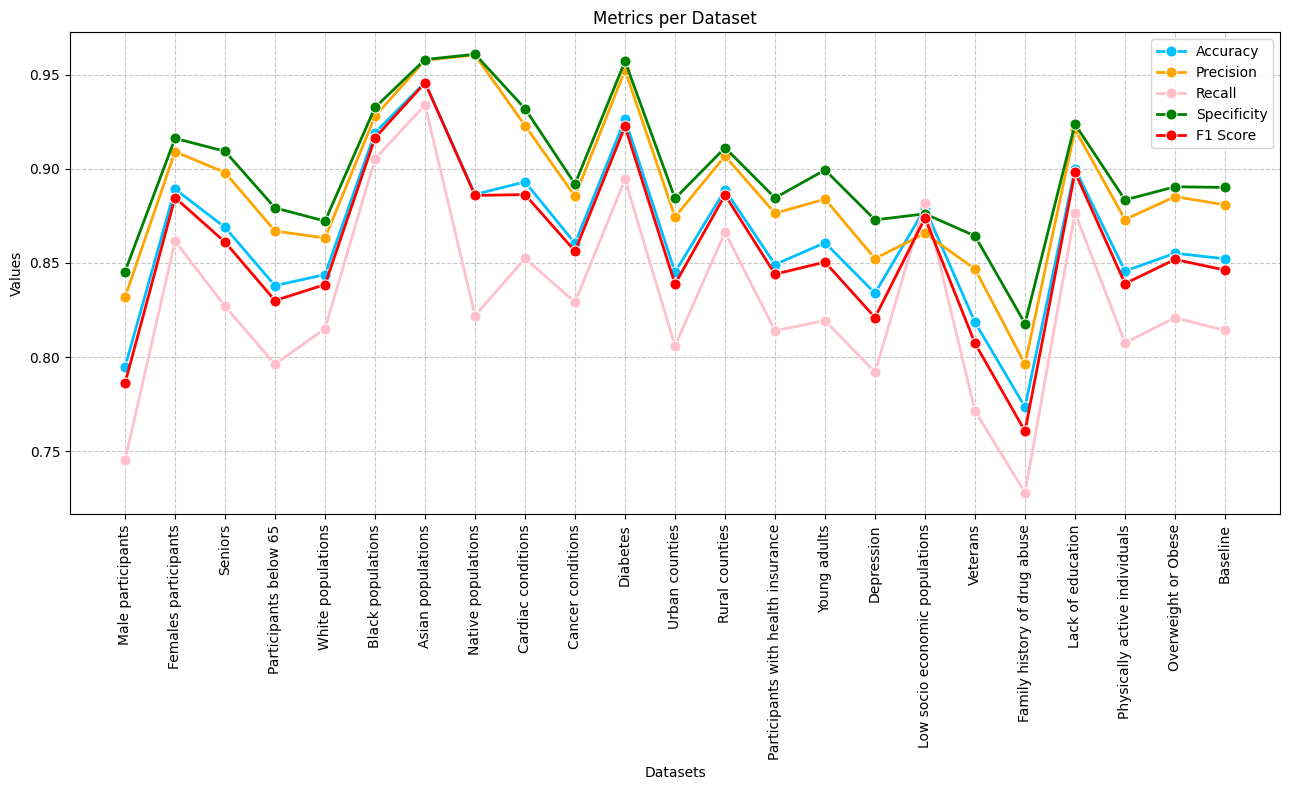

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'eval_df' is your DataFrame containing the metrics for each dataset
plt.figure(figsize=(13, 8))

# Plotting each metric separately and adding them to the legend
sns.lineplot(x='Dataset', y='Accuracy', data=eval_df, marker='o', color='deepskyblue', linewidth=2, markersize=8, label='Accuracy')
sns.lineplot(x='Dataset', y='Precision', data=eval_df, marker='o', color='orange', linewidth=2, markersize=8, label='Precision')
sns.lineplot(x='Dataset', y='Recall', data=eval_df, marker='o', color='pink', linewidth=2, markersize=8, label='Recall')
sns.lineplot(x='Dataset', y='Specificity', data=eval_df, marker='o', color='green', linewidth=2, markersize=8, label='Specificity')
sns.lineplot(x='Dataset', y='F1 Score', data=eval_df, marker='o', color='red', linewidth=2, markersize=8, label='F1 Score')

plt.xticks(rotation=90)
plt.title('Metrics per Dataset')
plt.xlabel('Datasets')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend(loc='best')  # Adding legend at the best position
plt.show()


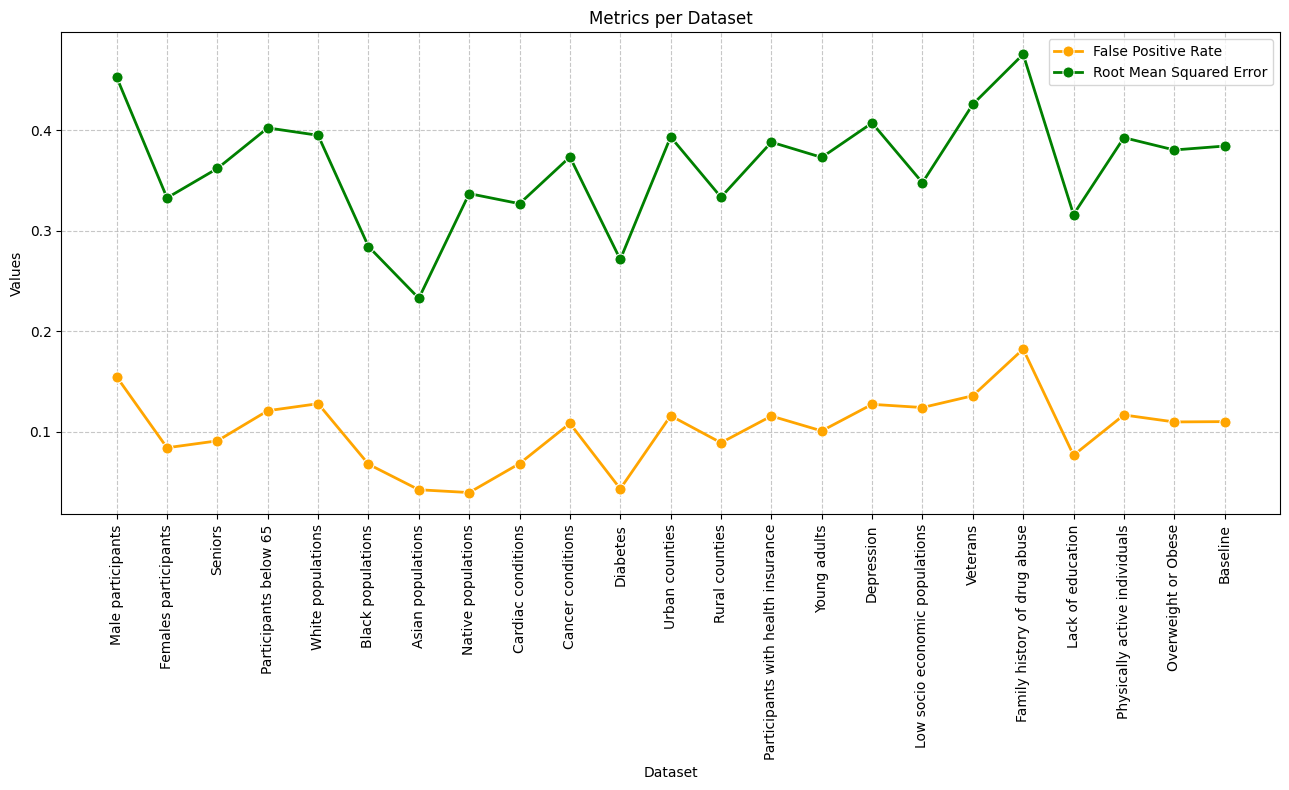

In [48]:
# For the negative metrics
plt.figure(figsize=(13, 8))
sns.lineplot(x='Dataset', y='FPR', data=eval_df, marker='o', color='orange', linewidth=2, markersize=8, label='False Positive Rate')
sns.lineplot(x='Dataset', y='RMSE', data=eval_df, marker='o', color='green', linewidth=2, markersize=8, label='Root Mean Squared Error')
plt.xticks(rotation=90)
plt.title('Metrics per Dataset')
plt.xlabel('Dataset')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend(loc='best')
plt.show()

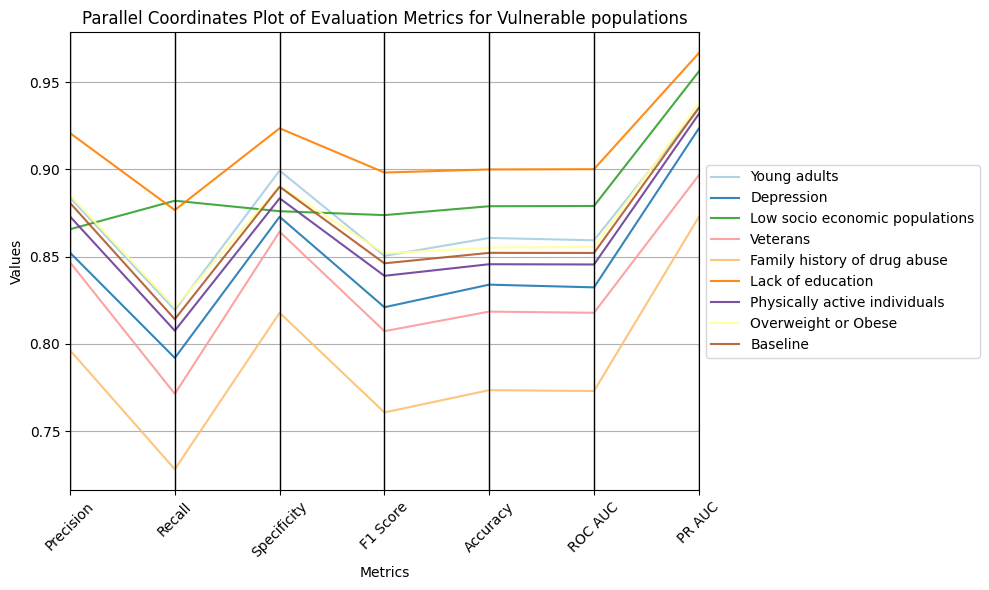

In [49]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Define the performance metrics you want to analyze
metrics = ['Dataset', 'Precision', 'Recall', 'Specificity', 'F1 Score', 'Accuracy', 'ROC AUC', 'PR AUC']

eval_df_subset = eval_df.tail(9)

# Plot parallel coordinates
plt.figure(figsize=(10, 6))
parallel_coordinates(eval_df_subset[metrics], 'Dataset', colormap='Paired', alpha=0.9)

# Add title and legend
plt.title('Parallel Coordinates Plot of Evaluation Metrics for Vulnerable populations')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.xlabel('Metrics')
plt.ylabel('Values')
# Show plot
plt.tight_layout()
plt.show()


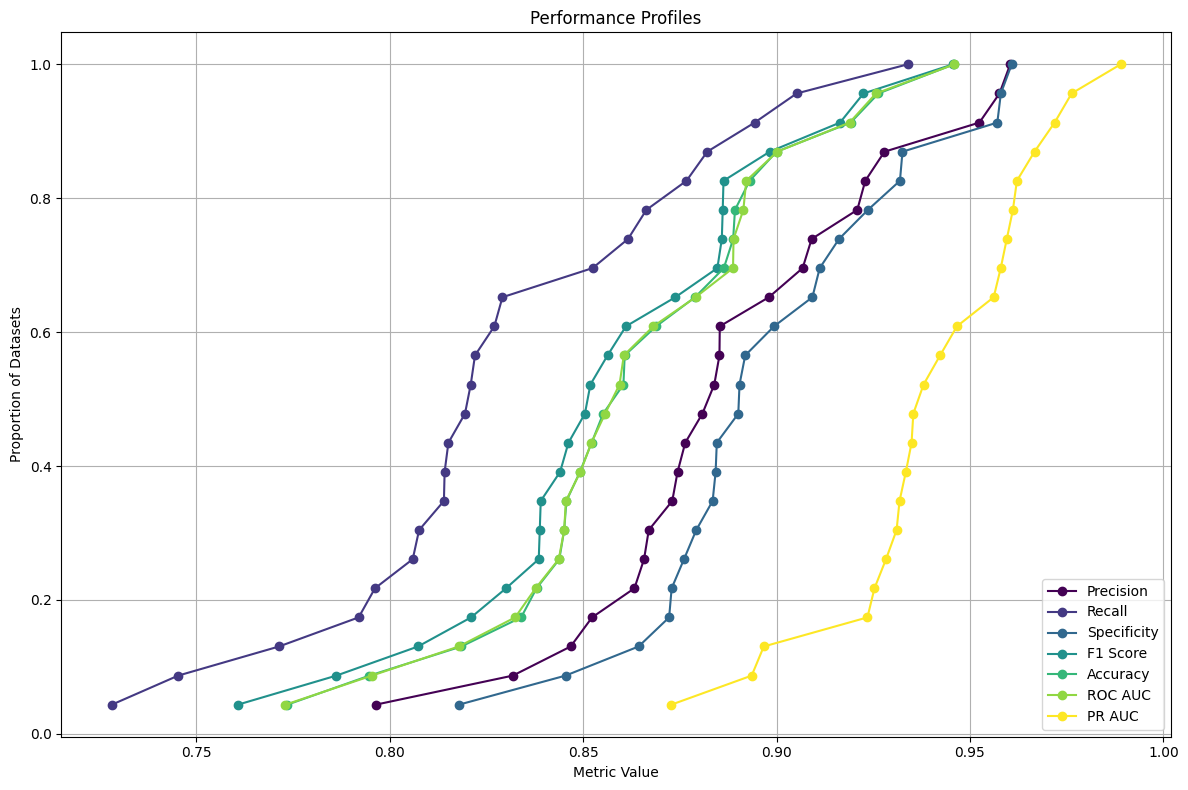

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the performance metrics you want to analyze
metrics = ['Precision', 'Recall', 'Specificity', 'F1 Score', 'Accuracy', 'ROC AUC', 'PR AUC']

# Create a figure
plt.figure(figsize=(12, 8))

# Define color palette for each metric
colors = plt.cm.viridis(np.linspace(0, 1, len(metrics)))

# Plot cumulative distribution for each metric
for i, metric in enumerate(metrics):
    # Sort the values of the metric
    sorted_values = np.sort(eval_df[metric])

    # Calculate the cumulative distribution
    cumulative_dist = np.arange(1, len(sorted_values) + 1) / len(sorted_values)

    # Plot the cumulative distribution
    plt.plot(sorted_values, cumulative_dist, marker='o', color=colors[i], label=metric)

# Add labels and title
plt.xlabel('Metric Value')
plt.ylabel('Proportion of Datasets')
plt.title('Performance Profiles')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


## 2. Trends over time

In [51]:
#Reading all the substance abuse brfss files from the past decade
df2011 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2011.xlsx")
df2012 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2012.xlsx")
df2013 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2013.xlsx")
df2014 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2014.xlsx")
df2015 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2015.xlsx")
df2016 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2016.xlsx")
df2017 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2017.xlsx")
df2018 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2018.xlsx")
df2019 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2019.xlsx")
df2020 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2020.xlsx")
df2021 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2021.xlsx")
df2022 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/Backup/Data/df2022.xlsx")

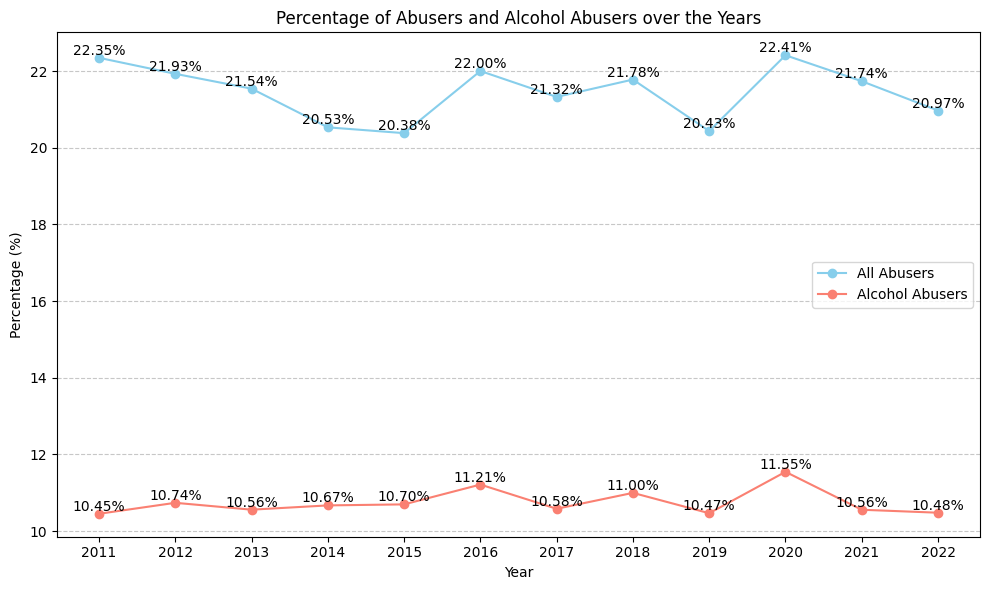

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# List of DataFrames
dfs = [df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022]

# Calculate the percentage of abusers and alcohol abusers for each year
abusers_percentage = []
alcohol_abusers_percentage = []
years = range(2011, 2023)

for df in dfs:
    total_records = len(df)
    abusers_count = df['TARGET_ABUSER'].sum()
    alcohol_abusers_count = df['ALCO_ABUSER'].sum()

    abusers_percentage.append(abusers_count / total_records * 100)
    alcohol_abusers_percentage.append(alcohol_abusers_count / total_records * 100)

# Plotting the lines
plt.figure(figsize=(10, 6))
plt.plot(years, abusers_percentage, marker='o', linestyle='-', color='skyblue', label='All Abusers')
plt.plot(years, alcohol_abusers_percentage, marker='o', linestyle='-', color='salmon', label='Alcohol Abusers')

# Adding text annotations for percentage values
for year, ab_percentage, alc_percentage in zip(years, abusers_percentage, alcohol_abusers_percentage):
    plt.text(year, ab_percentage, f'{ab_percentage:.2f}%', ha='center', va='bottom')
    plt.text(year, alc_percentage, f'{alc_percentage:.2f}%', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Abusers and Alcohol Abusers over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(years)
plt.legend()
plt.tight_layout()
plt.show()


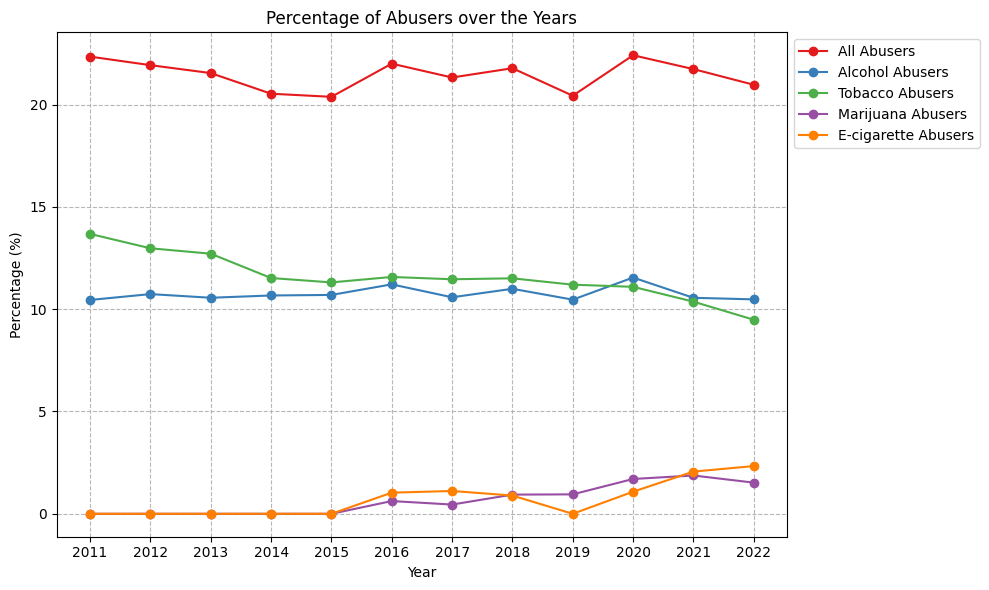

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette
colors = sns.color_palette("Set1", 5)
colors.reverse

# List of DataFrames
dfs = [df2011, df2012, df2013, df2014, df2015, df2016, df2017, df2018, df2019, df2020, df2021, df2022]

# Initialize lists for storing percentages
abusers_percentage = []
alcohol_abusers_percentage = []
tobacco_abusers_percentage = []
marijuana_abusers_percentage = []
ecigarette_abusers_percentage = []
years = range(2011, 2023)

# Loop through each DataFrame
for df in dfs:
    total_records = len(df)
    abusers_count = df['TARGET_ABUSER'].sum()
    alcohol_abusers_count = df.get('ALCO_ABUSER', pd.Series(dtype=bool)).sum()  # Default value of 0 if column doesn't exist
    tobacco_abusers_count = df.get('TOBA_ABUSER', pd.Series(dtype=bool)).sum()  # Default value of 0 if column doesn't exist
    marijuana_abusers_count = df.get('MARIJ_ABUSER', pd.Series(dtype=bool)).sum()  # Default value of 0 if column doesn't exist
    ecigarette_abusers_count = df.get('ECIG_ABUSER', pd.Series(dtype=bool)).sum()  # Default value of 0 if column doesn't exist

    # Calculate percentages
    abusers_percentage.append(abusers_count / total_records * 100)
    alcohol_abusers_percentage.append(alcohol_abusers_count / total_records * 100)
    tobacco_abusers_percentage.append(tobacco_abusers_count / total_records * 100)
    marijuana_abusers_percentage.append(marijuana_abusers_count / total_records * 100)
    ecigarette_abusers_percentage.append(ecigarette_abusers_count / total_records * 100)

# Plotting the lines
plt.figure(figsize=(10, 6))
plt.plot(years, abusers_percentage, marker='o', linestyle='-', color=colors[0], label='All Abusers')
plt.plot(years, alcohol_abusers_percentage, marker='o', linestyle='-', color=colors[1], label='Alcohol Abusers')
plt.plot(years, tobacco_abusers_percentage, marker='o', linestyle='-', color=colors[2], label='Tobacco Abusers')
plt.plot(years, marijuana_abusers_percentage, marker='o', linestyle='-', color=colors[3], label='Marijuana Abusers')
plt.plot(years, ecigarette_abusers_percentage, marker='o', linestyle='-', color=colors[4], label='E-cigarette Abusers')

# Adding text annotations for percentage values
#for year, ab_percentage, alc_percentage, tob_percentage, marij_percentage, ecig_percentage in zip(years, abusers_percentage, alcohol_abusers_percentage, tobacco_abusers_percentage, marijuana_abusers_percentage, ecigarette_abusers_percentage):
#    plt.text(year, ab_percentage, f'{ab_percentage:.2f}%', ha='center', va='bottom')
#    plt.text(year, alc_percentage, f'{alc_percentage:.2f}%', ha='center', va='bottom')
#    plt.text(year, tob_percentage, f'{tob_percentage:.2f}%', ha='center', va='bottom')
#    plt.text(year, marij_percentage, f'{marij_percentage:.2f}%', ha='center', va='bottom')
#    plt.text(year, ecig_percentage, f'{ecig_percentage:.2f}%', ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Abusers over the Years')
plt.grid(axis='both', linestyle='--', alpha=0.9)
plt.xticks(years)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [54]:
!pip install statsmodels

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Example data (replace with actual data)
data = {
    'Year': range(2011, 2023),
    'All Abusers': abusers_percentage,
    'Alcohol Abusers': alcohol_abusers_percentage,
}
df = pd.DataFrame(data)
df.set_index('Year', inplace=True)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

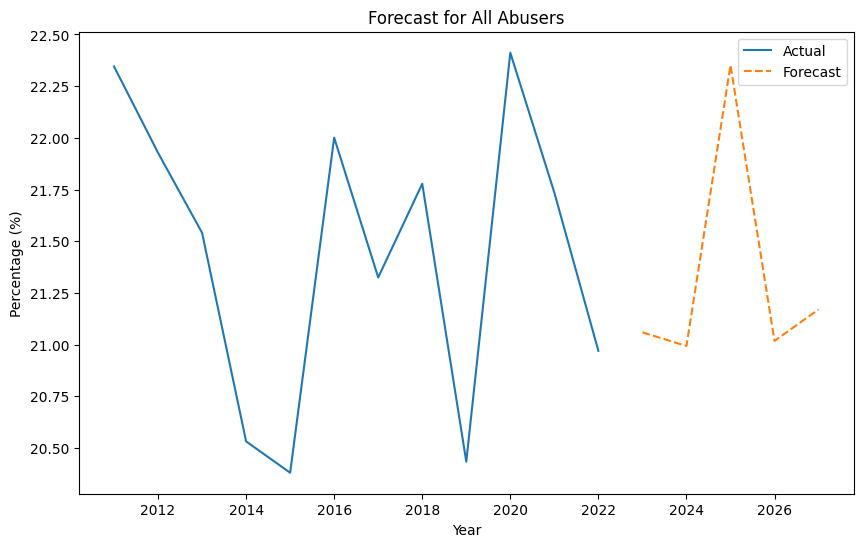

In [56]:
# Fit ARIMA model
model = ARIMA(df['All Abusers'], order=(5,1,0))
model_fit = model.fit()

# Summary of the model
#print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=5)
#print("Forecasted values:", forecast)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['All Abusers'], label='Actual')
plt.plot(range(2023, 2023+len(forecast)), forecast, label='Forecast', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Forecast for All Abusers')
plt.legend()
plt.show()
